## App Reviews Sentiment Analysis - NLP

Mobile applications are important tools that make users’ daily lives easier. Users share their experiences and satisfaction through comments and reviews on app stores. These reviews are a critical source of feedback for app developers because they help them understand users’ needs, improve their apps, and gain a competitive advantage.

Sentiment analysis is a method used to determine the emotional tone of text data. By performing sentiment analysis on app reviews, users’ overall satisfaction level, positive or negative feedback about the app can be quickly determined. This allows developers to understand user feedback and improve app performance.

This project aims to perform sentiment analysis of user comments in app reviews. Using natural language processing (NLP) techniques and machine learning algorithms, it is aimed to determine positive, negative, and neutral sentiments in the reviews. The results will provide developers with strategic information to improve user experiences.

<img src='app.png' width=350 >

### Import Libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('linkedin-reviews.csv')
#Read the file.

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
df.shape

(702, 2)

In [6]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
df['Review']=df['Review'].str.lower()
df['Review']=df['Review'].str.replace("[^\w\s]" , "",regex=True)
df['Review']=df['Review'].str.replace('[\n]', '',regex=True)
df['Review']=df['Review'].str.replace('\d+','',regex=True)
df['Review']=df['Review'].str.replace('\r',' ')

In [8]:
df['Review'][0]

'does absolutely nothing for a linkedin beginner force closes too useless app'

In [9]:
df['Rating'].value_counts()

Rating
1    275
4    122
3    121
5     95
2     89
Name: count, dtype: int64

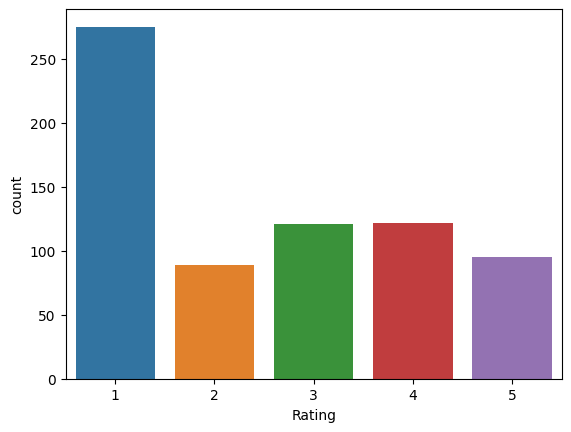

In [10]:
sns.countplot(x=df['Rating']);

In [81]:
df['Review Length'] = df['Review'].apply(len)

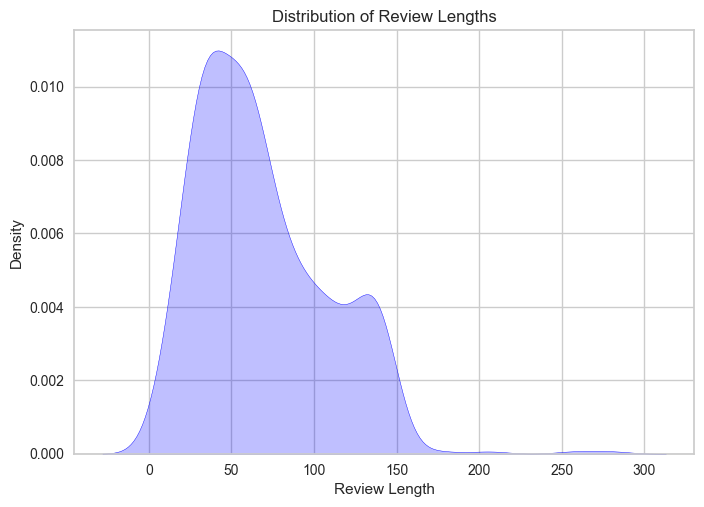

In [82]:
sns.kdeplot(df['Review Length'], fill=True, color='blue')
plt.title('Distribution of Review Lengths');

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Separating Non-English Languages

In [12]:
#pip install langdetect

In [13]:
from langdetect import detect

In [14]:
df['lang']=df['Review'].apply(lambda x: detect(x))

In [15]:
df['lang'].value_counts()

lang
en    604
af     29
fr      9
ca      7
nl      6
ro      5
so      5
et      5
cy      4
es      4
no      3
it      3
da      3
sl      2
pl      2
sv      2
tl      2
fi      2
cs      2
pt      2
sk      1
Name: count, dtype: int64

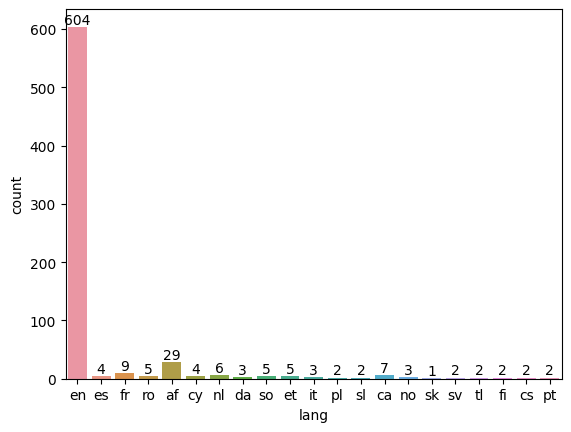

In [16]:
ax=sns.countplot(x=df['lang'])
ax.bar_label(ax.containers[0]);

In [17]:
df=df[df['lang'] == 'en']
#We remove non-English comments.

In [18]:
df['lang'].unique()

array(['en'], dtype=object)

In [19]:
df.head()

,Review,Rating,lang
0,does absolutely nothing for a linkedin beginne...,1,en
2,slow and it tries to upload your contacts with...,1,en
3,add ability to customize the profile and move ...,4,en
4,good app but its a pain that its not possible ...,4,en
5,this app is poor and bad linkedin app on my ht...,1,en


### Sentiment Analysis

In [20]:
df.loc[(df['Rating']==1)|(df['Rating']==2),'sentiment']='negative'
df.loc[(df['Rating']==3,'sentiment')]='neutral'
df.loc[(df['Rating']==4)|(df['Rating']==5),'sentiment']='positive'

In [21]:
df.head()

,Review,Rating,lang,sentiment
0,does absolutely nothing for a linkedin beginne...,1,en,negative
2,slow and it tries to upload your contacts with...,1,en,negative
3,add ability to customize the profile and move ...,4,en,positive
4,good app but its a pain that its not possible ...,4,en,positive
5,this app is poor and bad linkedin app on my ht...,1,en,negative


In [22]:
df['sentiment'].value_counts()

sentiment
negative    319
positive    177
neutral     108
Name: count, dtype: int64

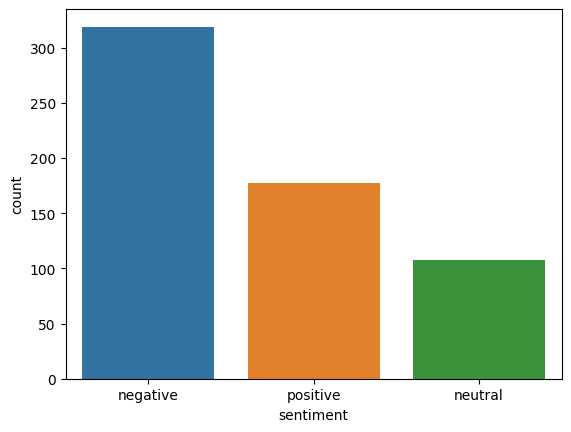

In [23]:
sns.countplot(x=df['sentiment']);

### WordCloud

In [90]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('like.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [92]:
like=df[df['Rating']==5]['Review']

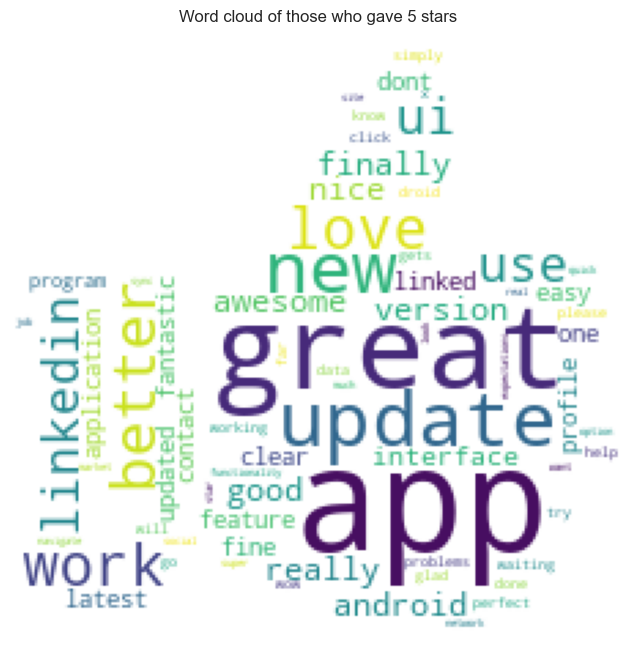

In [93]:
wc(like,'white')
plt.title('Word cloud of those who gave 5 stars');

In [94]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('d.jpg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [95]:
dislike=df[df['Rating']==1]['Review']

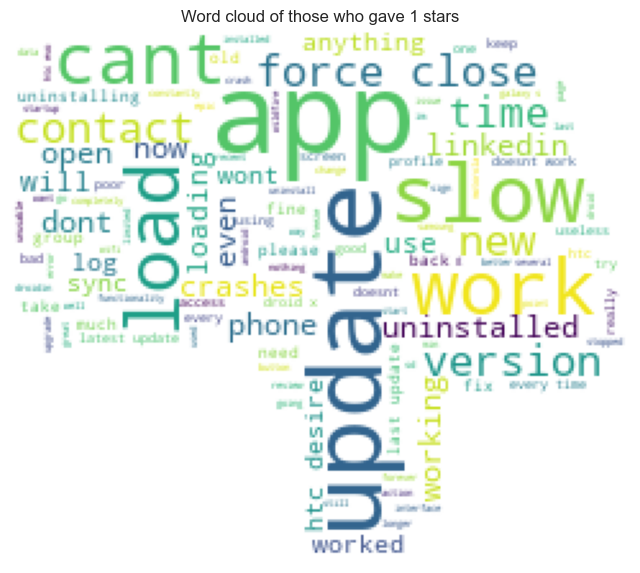

In [96]:
wc(dislike,'white')
plt.title('Word cloud of those who gave 1 stars');

In [35]:
pozitive=df[df['sentiment']=='positive']['Review']
negative=df[df['sentiment']=='negative']['Review']
neutral=df[df['sentiment']=='neutral']['Review']

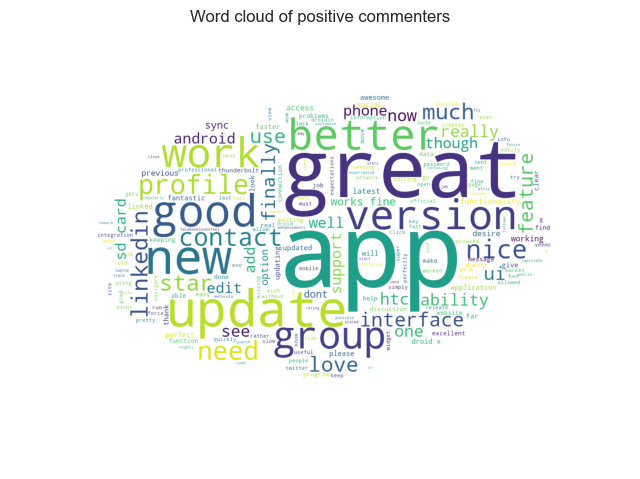

In [88]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords=STOPWORDS, mask = mask) 
    wc.generate(' '.join(data))
    plt.imshow(wc)    
    plt.axis("off")
    

wc(pozitive)
plt.title('Word cloud of positive commenters');

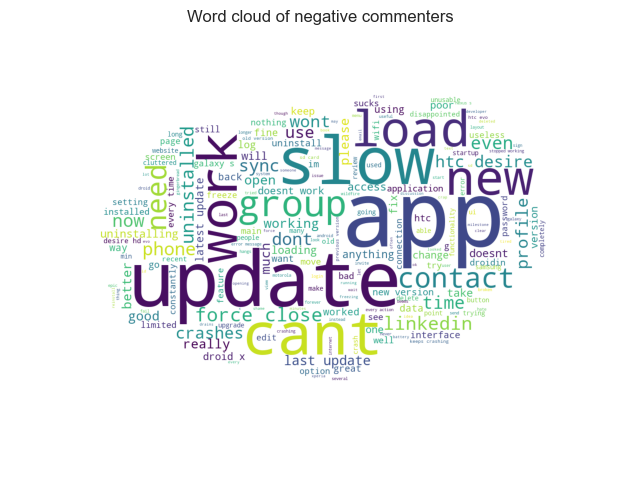

In [87]:
wc(negative)
plt.title('Word cloud of negative commenters');

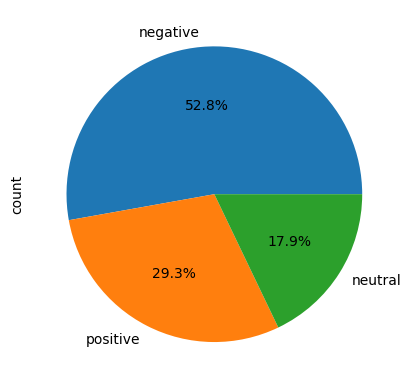

In [38]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%');

### Polarity-Subjectivity

In [41]:
from textblob import TextBlob

In [42]:
df['polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity']= df['Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [43]:
df.head()

,Review,Rating,lang,sentiment,polarity,subjectivity
0,does absolutely nothing for a linkedin beginne...,1,en,negative,-0.15,0.550000
2,slow and it tries to upload your contacts with...,1,en,negative,-0.30,0.600000
3,add ability to customize the profile and move ...,4,en,positive,0.00,0.000000
4,good app but its a pain that its not possible ...,4,en,positive,0.25,0.725000
5,this app is poor and bad linkedin app on my ht...,1,en,negative,-0.55,0.633333


### Removing Stop Words and Vectorizing

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [49]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [50]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [51]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

### Modelling

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification

In [55]:
x=df['Review']
y=df['sentiment']

In [56]:
x=vect.fit_transform(x)

In [57]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

In [76]:
r=RandomForestClassifier()
model=r.fit(x_train,y_train)

In [77]:
rpred=r.predict(x_test)
accuracy_score(rpred,y_test)

0.6859504132231405

In [78]:
print(classification_report(rpred, y_test))

              precision    recall  f1-score   support

    negative       0.86      0.70      0.77        84
     neutral       0.14      0.50      0.22         6
    positive       0.68      0.68      0.68        31

    accuracy                           0.69       121
   macro avg       0.56      0.63      0.56       121
weighted avg       0.77      0.69      0.72       121



In [79]:
confusion_matrix(rpred, y_test)

array([[59, 16,  9],
       [ 2,  3,  1],
       [ 8,  2, 21]], dtype=int64)

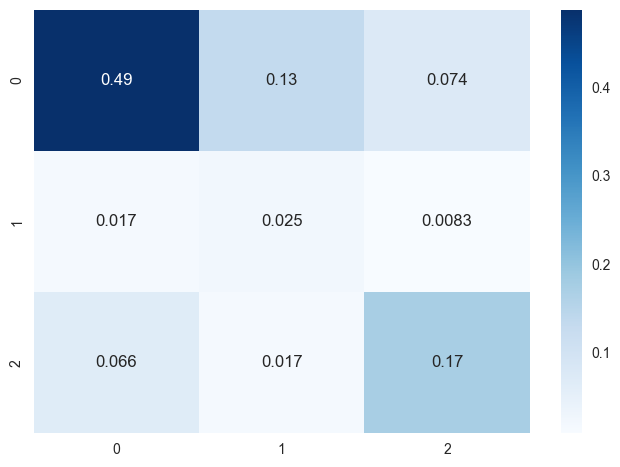

In [80]:
cm = confusion_matrix(rpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues');

In [101]:
#K-Fold Cross Validation
x=df['Review']
y=df['sentiment']
x=vect.fit_transform(x)

model=RandomForestClassifier()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.71900826 0.61157025 0.66115702 0.65289256 0.7       ]
Mean Accuracy: 0.6689256198347108


#### K-Fold Cross Validation
1. Accuracy Scores: [0.71900826, 0.61157025, 0.66115702, 0.65289256, 0.7]
These values represent the accuracy rates of your model in each fold.
The first layer was 0.719 (approximately 72%), the second layer was 0.611 (approximately 61%), the third layer was 0.661 (approximately 66%), the fourth layer was 0.652 (approximately 65%), and the fifth layer was 0.700 (approximately 70%).

2. Average Accuracy: 0.6689256198347108 (approximately 67%)
This represents the overall performance of your model. An average accuracy of 67% indicates that the model performed reasonably well in most cases.

In [64]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):
    
    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    nb = MultinomialNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr, b, nb, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB', 'MultinomialNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)
    
    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
        
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1
    
    
    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [65]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1-score
Random Forest,0.719008,0.679654,0.719008,0.682259
Gradient Boosting,0.702479,0.684558,0.702479,0.673563
SVM,0.685950,0.587842,0.685950,0.617927
BernoulliNB,0.661157,0.666983,0.661157,0.633074
MLP Classifier,0.628099,0.650437,0.628099,0.630818
Logistic Regression,0.619835,0.605344,0.619835,0.607762
MultinomialNB,0.611570,0.616598,0.611570,0.605968
K-Nearest Neighbors,0.561983,0.505518,0.561983,0.525365
Decision Tree,0.553719,0.588807,0.553719,0.558082
AdaBoost,0.528926,0.522144,0.528926,0.524906


### AutoML with Pycaret

In [70]:
x=df['Review']
y=df['sentiment']

In [71]:
from pycaret.classification import*

In [72]:
a=setup(data=df,target="sentiment")

,Description,Value
0,Session id,868
1,Target,sentiment
2,Target type,Multiclass
3,Target mapping,"negative: 0, neutral: 1, positive: 2"
4,Original data shape,"(604, 6)"
5,Transformed data shape,"(604, 6)"
6,Transformed train set shape,"(422, 6)"
7,Transformed test set shape,"(182, 6)"
8,Numeric features,3
9,Categorical features,2


In [73]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0220
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0270
svm,SVM - Linear Kernel,0.9197,0.0000,0.9197,0.9060,0.9003,0.8587,0.8773,0.0260
ridge,Ridge Classifier,0.8223,0.0000,0.8223,0.6895,0.7463,0.6711,0.7254,0.0210
et,Extra Trees Classifier,0.7154,1.0000,0.7154,0.8038,0.6854,0.5614,0.6322,0.0550
nb,Naive Bayes,0.7061,0.6884,0.7061,0.5174,0.5912,0.4494,0.5717,0.0210
xgboost,Extreme Gradient Boosting,0.5284,0.7866,0.5284,0.2793,0.3654,0.0000,0.0000,0.0390
dummy,Dummy Classifier,0.5284,0.5000,0.5284,0.2793,0.3654,0.0000,0.0000,0.0220
qda,Quadratic Discriminant Analysis,0.5251,0.0000,0.5251,0.3091,0.3810,0.1393,0.1744,0.0230
ada,Ada Boost Classifier,0.4621,0.0000,0.4621,0.3394,0.3627,0.3285,0.4622,0.0360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Summary

App reviews are an important data source for understanding user satisfaction. Sentiment analysis aims to determine the overall satisfaction level of users by determining the emotional tone of these reviews. In this project, we trained our model using natural language processing techniques and achieved a 70 percent success rate. We analyzed positive, negative and neutral sentiments in mobile app reviews. We successfully completed our project.